**Name:** Sudeshna Bora

**Assignment #**: 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')

**1 Coefficient of variation and Fano factor** 

**1(a)**

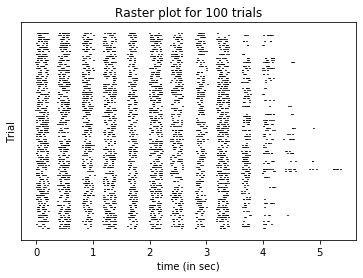

In [2]:
spike_times = np.loadtxt('SpikeTimes.dat')
# 100 spike time indices of 100 trials

#Transpose the matrix into NXM so that each row represents each trials , this is done for my own comfort
spike_times_records = spike_times.T

lineoffset = 1
offset = .0002
for i in range(100):
    x = spike_times_records[i,:]
    x = x[~np.isnan(x)]
    plt.eventplot(x*10**-3, colors='black', lineoffsets=lineoffset,linelengths=0.0001)
    lineoffset = lineoffset+offset
plt.yticks([])
plt.title('Raster plot for 100 trials')
plt.xlabel('time (in sec)')
plt.ylabel('Trial')
plt.show()


**1(b)**

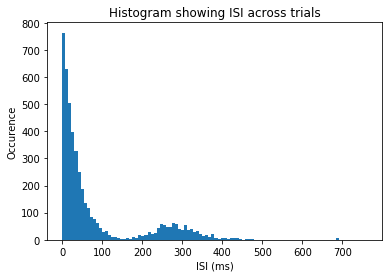

In [3]:
isi = np.diff(spike_times, axis=0)
isi_flattened = isi[~np.isnan(isi)]
plt.hist(isi_flattened,100)
plt.title('Histogram showing ISI across trials')
plt.xlabel('ISI (ms)')
plt.ylabel('Occurence')
plt.show()

There is a decay of interspike interval with a small increase acround 200-400 ms range.

**1(c)**

In [4]:
cv = np.std(isi_flattened) / np.mean(isi_flattened)
print("The CV is {}".format(cv))

The CV is 1.3537882337148048


**1(d)**

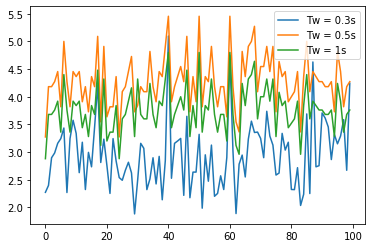

In [5]:
                
def trial_resolved_fano_factor(tw, spikes,trial_length,num_trials):
    tW = tw*10000
    no_of_windows = int(trial_length*10000/tW)
    fano_factor = []
    for trial in range(num_trials):
        spike_counts = []
        current_spikes = spikes[:,trial]
        current_spikes = current_spikes[~np.isnan(current_spikes)]
        for i in range(int(no_of_windows)):
            start_index = i*tW
            end_index = (i+1)*tW - 1
            spike_count = np.sum(np.logical_and(current_spikes >= start_index, current_spikes <= end_index))
            spike_counts.append(spike_count)
        fano_factor.append(np.var(spike_counts) / np.mean(spike_counts))
    return fano_factor

tw = [0.3,0.5,1]
ff = trial_resolved_fano_factor(0.3,spike_times,5.5,int(spike_times.shape[1]))
plt.plot(np.array(ff)*0.1, label = 'Tw = 0.3s')
ff01 = trial_resolved_fano_factor(0.5,spike_times,5.5,int(spike_times.shape[1]))
plt.plot(np.array(ff01)*0.1, label = 'Tw = 0.5s')
ff02 = trial_resolved_fano_factor(1,spike_times,5.5,int(spike_times.shape[1]))
plt.plot(np.array(ff02)*0.1, label = 'Tw = 1s')
plt.legend()
plt.show()

In [6]:
def spike_train(num_trials, trial_dur, resolution, spikes_time_array):
    ind_res = 1/resolution
    spikes = np.zeros((num_trials, int(trial_dur * ind_res)))
    for i in np.arange(0, num_trials, 1) :
        for element in spikes_time_array[i,:]* ind_res:
            if ~(np.isnan(element)):
                spikes[i, int(element)] = 1
    return spikes

**Note** : Took help from Ana Itzel for plotting my time resolved fano factor.

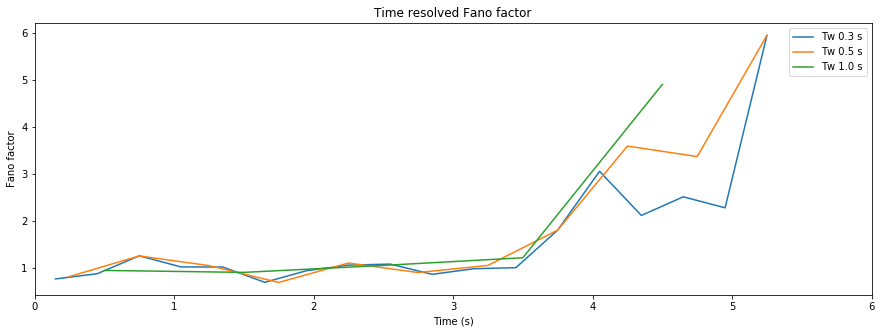

In [7]:
spike_times_array = (spike_times/1000).T

spike = spike_train(num_trials = 100, trial_dur = 5.5, resolution = 0.1/1000, spikes_time_array = spike_times_array)

def time_fano_factor(num_trials, trial_dur, window_lenght, spikes ):
    size_window = int(window_lenght * 10000)
    num_windows = int(trial_dur *10000 / size_window) 
    counts = np.zeros((num_trials, num_windows))
    for j in np.arange(0, num_trials, 1):
        for win in np.arange(0, num_windows, 1):
            counts[j, win] = np.sum(spikes[j, size_window * win : size_window * (win+1)])
    return counts

tw_range = np.array([0.3, 0.5, 1])
fig = plt.figure(figsize=(15,5))
plt.title('Time resolved Fano factor')
plt.xlabel('Time (s)')
plt.ylabel('Fano factor')
plt.xlim(0,6)

for j, tw in enumerate(tw_range):
    count_array = time_fano_factor(num_trials =100, trial_dur = 5.5, window_lenght = tw, spikes = spike)
    fano_per_window = np.var(count_array, axis=0) / np.mean(count_array, axis=0)
    wr = np.arange(tw/2,len(fano_per_window)*tw+tw/2,  tw)
    plt.plot(wr, fano_per_window, label = f'Tw {tw} s') 
plt.legend()
plt.show()

Variability in fano factor value increases with increase in window size.

**2**

In [8]:
data = loadmat('PoissonSpikeTrains.mat')
spike_times_hom = data['SpikeTimes_hom']
spike_times_inhom = data['SpikeTimes_inh']
spike_times_ref = data['SpikeTimes_ref']
rates_ref = data['rates_ref']

**2(a)**

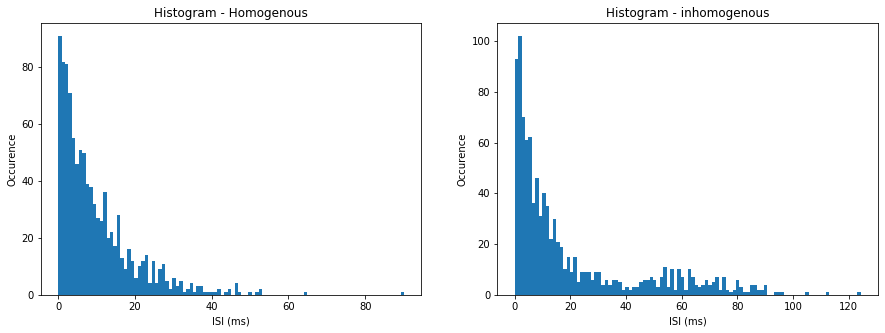

In [9]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
isi = np.diff(spike_times_hom[0], axis=0)
isi_flattened = isi[~np.isnan(isi)]
plt.sca(ax1)
plt.hist(isi_flattened,100)
plt.title('Histogram - Homogenous')
plt.xlabel('ISI (ms)')
plt.ylabel('Occurence')

isi = np.diff(spike_times_inhom[0], axis=0)
isi_flattened = isi[~np.isnan(isi)]
plt.sca(ax2)
plt.hist(isi_flattened,100)
plt.title('Histogram - inhomogenous')
plt.xlabel('ISI (ms)')
plt.ylabel('Occurence')
plt.show()

For homogenous distribution, there is only decay. 
Whereas, for inhomogenous distributios, we see a similar pattern as q1.

**2(b)**

In [10]:
isi = np.diff(spike_times_hom[0], axis=0)
isi_flattened = isi[~np.isnan(isi)]  # omit nan values
cv = np.std(isi_flattened) / np.mean(isi_flattened)
print("CV for homogenous data: {}".format(cv))

isi = np.diff(spike_times_inhom[0], axis=0)
isi_flattened = isi[~np.isnan(isi)]  # omit nan values
cv = np.std(isi_flattened) / np.mean(isi_flattened)
print("CV for inhomogenous data: {}".format(cv))

CV for homogenous data: 1.0126965180137786
CV for inhomogenous data: 1.180574287301639


In [11]:
tW = 100*10 #considering resolution
no_of_window = 10000/1000
spike_counts = []
for i in range(int(no_of_window-1)):
    start_index = i*1000
    end_index = (i+1)*1000 - 1
    spike_count = np.sum(np.logical_and(spike_times_hom[0] >= start_index, spike_times_hom[0] <= end_index))
    spike_counts.append(spike_count)
fano_factor = np.var(spike_counts) / np.mean(spike_counts)
print("Faco factor for homogenous data : {}".format(fano_factor))

Faco factor for homogenous data : 0.6251526251526252


In [12]:
tW = 100*10 #considering resolution
no_of_window = 20000/1000
spike_counts = []
for i in range(int(no_of_window-1)):
    start_index = i*1000
    end_index = (i+1)*1000 - 1
    spike_count = np.sum(np.logical_and(spike_times_inhom[0] >= start_index, spike_times_inhom[0] <= end_index))
    spike_counts.append(spike_count)
fano_factor = np.var(spike_counts) / np.mean(spike_counts)
print("Faco factor for inhomogenous data : {}".format(fano_factor))

Faco factor for inhomogenous data : 0.855165485293297


**2(c)**

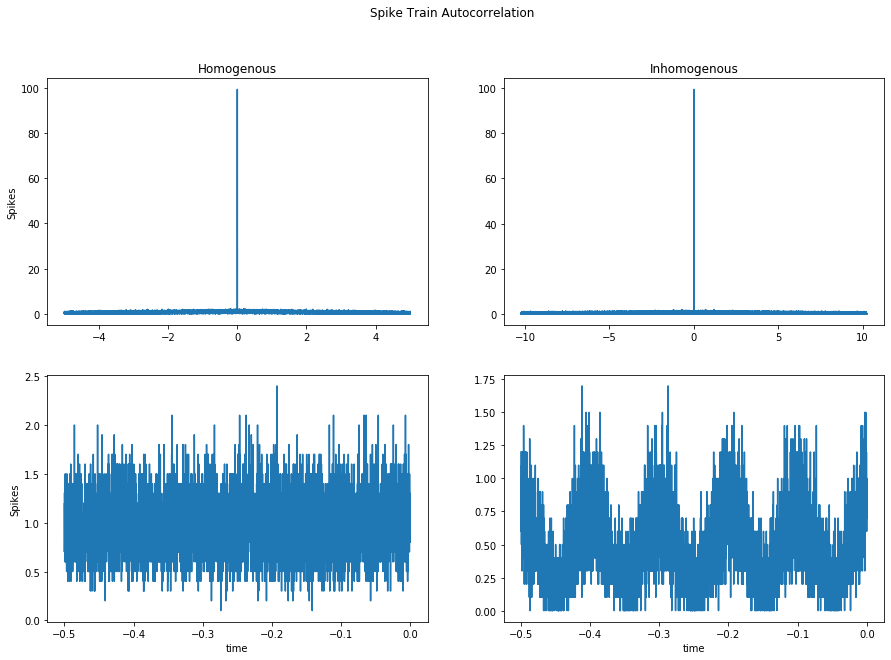

In [13]:
spike_time_hom = np.round(spike_times_hom, 1) / 1000
spike_time_inh = np.round(spike_times_inhom, 1) / 1000

trial_duration_hom = 10
trial_duration_inh = 20.5

spikes_hom = spike_train(num_trials = 1, trial_dur = trial_duration_hom, resolution = 0.1/1000, spikes_time_array = spike_time_hom)
spikes_inh = spike_train(num_trials = 1, trial_dur = trial_duration_inh, resolution = 0.1/1000, spikes_time_array = spike_time_inh)

bin_size = 0.1 #seconds
autocorrelation_hom = np.correlate(spikes_hom[0,:], spikes_hom[0,:], mode='same') * bin_size
autocorrelation_inh = np.correlate(spikes_inh[0,:], spikes_inh[0,:], mode='same') * bin_size

time_hom = np.arange(-trial_duration_hom/2, trial_duration_hom/2., 0.0001)
time_inh = np.arange(-trial_duration_inh/2, trial_duration_inh/2., 0.0001)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

ax[0,0].plot(time_hom, autocorrelation_hom)
ax[1,0].plot(time_hom[45000:50000], autocorrelation_hom[45000:50000])
ax[0,0].set_title('Homogenous')
ax[0,0].set_ylabel('Spikes')
ax[1,0].set_ylabel('Spikes')
ax[1,0].set_xlabel('time')
ax[1,1].set_xlabel('time')
ax[0,1].plot(time_inh, autocorrelation_inh)
ax[1,1].plot(time_inh[97500:102500], autocorrelation_inh[97500:102500])
ax[0,1].set_title('Inhomogenous')

plt.suptitle('Spike Train Autocorrelation')
plt.show()

**2(d)** There is a difference between computed and analytical value as the distribution is not completely poisson distribution.

**3**

In [14]:
spike_times_ref = spike_times_ref.T

**3(a)**

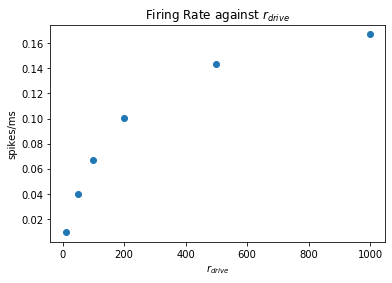

In [15]:
firing_rate = []
#finding the firing rate by inverse of interspike interval
for trial in range(6):
    #calculate interspike interval
    ISI = np.diff(spike_times_ref[trial,:])
    #mean of ISI
    ISI_mean = np.mean(ISI)
    #inverse of ISI
    firing_rate.append(1/ISI_mean)
firing_rate = np.array(firing_rate)
np.shape(firing_rate)
plt.plot(rates_ref[0], firing_rate, 'o')   
plt.title('Firing Rate against $r_{drive}$')
plt.ylabel('spikes/ms')
plt.xlabel('$r_{drive}$')
plt.show()

For large driving rates $r$, the effective spike rate $r_\mathrm{eff}$ saturates, because the neuron cannot fire quickly enough due to the refractory period. Its maximum spike rate is the inverse of duration of the refractory period.

**2(b)**

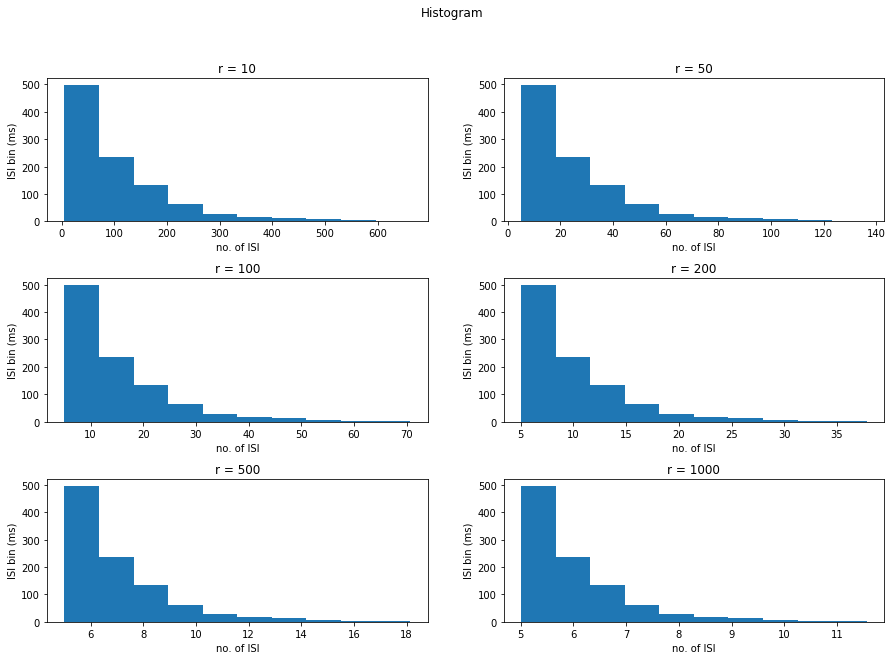

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)
plt.sca(axes[0,0])
plt.hist(np.diff(spike_times_ref[0,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][0]))

plt.sca(axes[0,1])
plt.hist(np.diff(spike_times_ref[1,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][1]))

plt.sca(axes[1,0])
plt.hist(np.diff(spike_times_ref[2,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][2]))

plt.sca(axes[1,1])
plt.hist(np.diff(spike_times_ref[3,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][3]))

plt.sca(axes[2,0])
plt.hist(np.diff(spike_times_ref[4,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][4]))

plt.sca(axes[2,1])
plt.hist(np.diff(spike_times_ref[5,:]))
plt.xlabel('no. of ISI')
plt.ylabel('ISI bin (ms)')
plt.title('r = {}'.format(rates_ref[0][5]))

plt.suptitle('Histogram')
plt.show()

**2(c)**

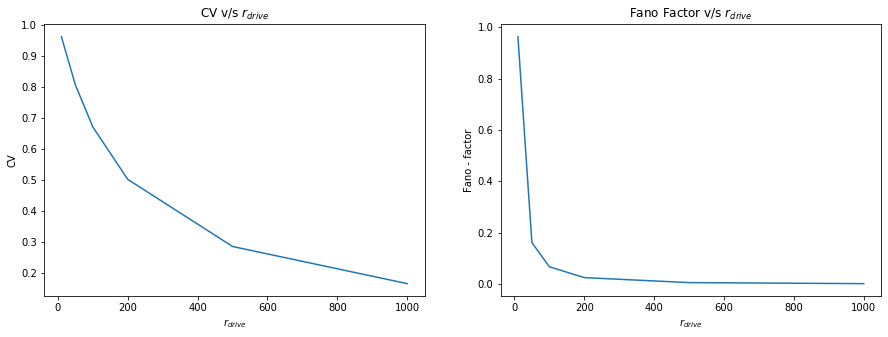

In [17]:
cvs = []
ffs = []
for i in range(6):
    n = np.diff(spike_times_ref[i,:])
    cv = np.std(n) / np.mean(n)
    cvs.append(cv)
    ff = np.std(n)**2/np.mean(n)
    ffs.append(ff/100)
cvs = np.array(cvs)
ffs = np.array(ffs)

fig, (ax01, ax02) = plt.subplots(1, 2, figsize=(15, 5))
plt.sca(ax01)
plt.plot(rates_ref[0], cvs)
plt.title('CV v/s $r_{drive}$')
plt.xlabel('$r_{drive}$')
plt.ylabel('CV')

plt.sca(ax02)
plt.plot(rates_ref[0], ffs)
plt.title('Fano Factor v/s $r_{drive}$')
plt.xlabel('$r_{drive}$')
plt.ylabel('Fano - factor')

plt.show()   

Variation decreases with increase in $r_{drive}$ as ISI approximates to refractory period.

**2(d)**

Text(0.5, 0, 'Time')

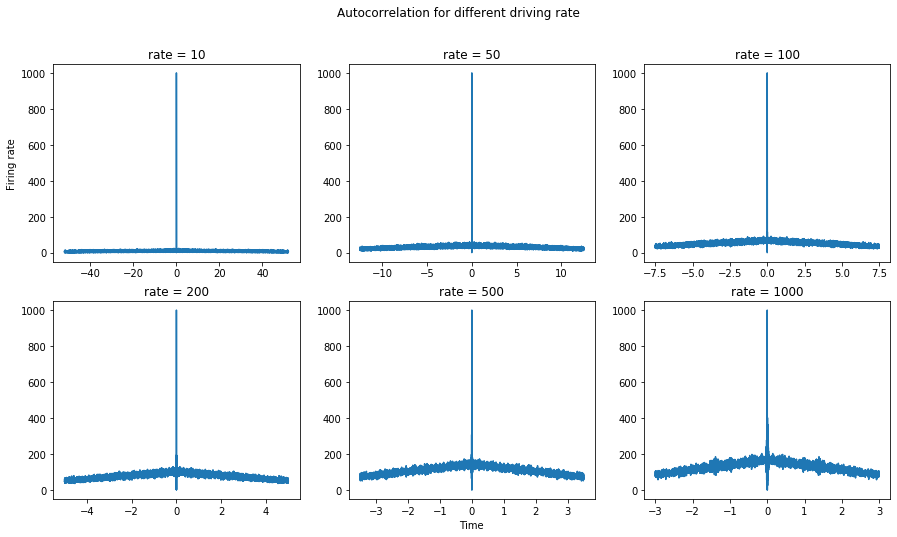

In [18]:
bin_size = 1 #ms
fig, ax = plt.subplots(2,3,figsize = (15,8))

spike_times_ref = spike_times_ref/1000

for i, rate in enumerate(rates_ref[0]):
    max_sec = int(np.round((spike_times_ref.max(axis=1))[i])) 
    spike_t = np.array([spike_times_ref[i,:]])
    spikes_ = spike_train(num_trials=1, trial_dur = max_sec, resolution = 1/1000, spikes_time_array = spike_t)
    autocorrelation = np.correlate(spikes_[0,:], spikes_[0,:], mode='same') * bin_size
    tr = np.arange(-max_sec/2, max_sec/2., 0.001)
    ax[int(i/3), int(i%3)].plot(tr, autocorrelation)
    ax[int(i/3), int(i%3)].set(title=f'rate = {rate}' )
plt.suptitle('Autocorrelation for different driving rate')
ax[0,0].set_ylabel('Firing rate')
ax[1,1].set_xlabel('Time')

If we ignore the peak and zoom in we can see multiple peaks for higher driving rate. 

**4** Reusing and modifying the code provided in generatePoissonTrain.py

**4(a)**

In [37]:
def create_poisson_distribution(no_of_spikes,order,rate=100):
    n = order*no_of_spikes   # adjusting for order
    randNumbers = np.random.rand(n)  # n random numbers, uniform distribution
    ISIs = -np.log(randNumbers)/rate   # ISIs in seconds
    ISIs = ISIs*1000   # ISIs in milliseconds
    # compute spike times from ISIs
    SpikeTimes = np.cumsum(ISIs)
    gamma = SpikeTimes[::order]
    return gamma

In [38]:
gamma_2 = create_poisson_distribution(1000,2)
gamma_3 = create_poisson_distribution(1000,3)
gamma_5 = create_poisson_distribution(1000,5)
gamma_10 = create_poisson_distribution(1000,10)
assert 1000 == gamma_2.shape[0]
assert 1000 == gamma_3.shape[0]
assert 1000 == gamma_5.shape[0]
assert 1000 == gamma_10.shape[0]

In [39]:
def p_ISI(tau,order,rate=100):
    den = np.math.factorial(order-1)
    num = rate*(rate*tau)**(order-1)*np.exp(-rate*tau)
    return num/den


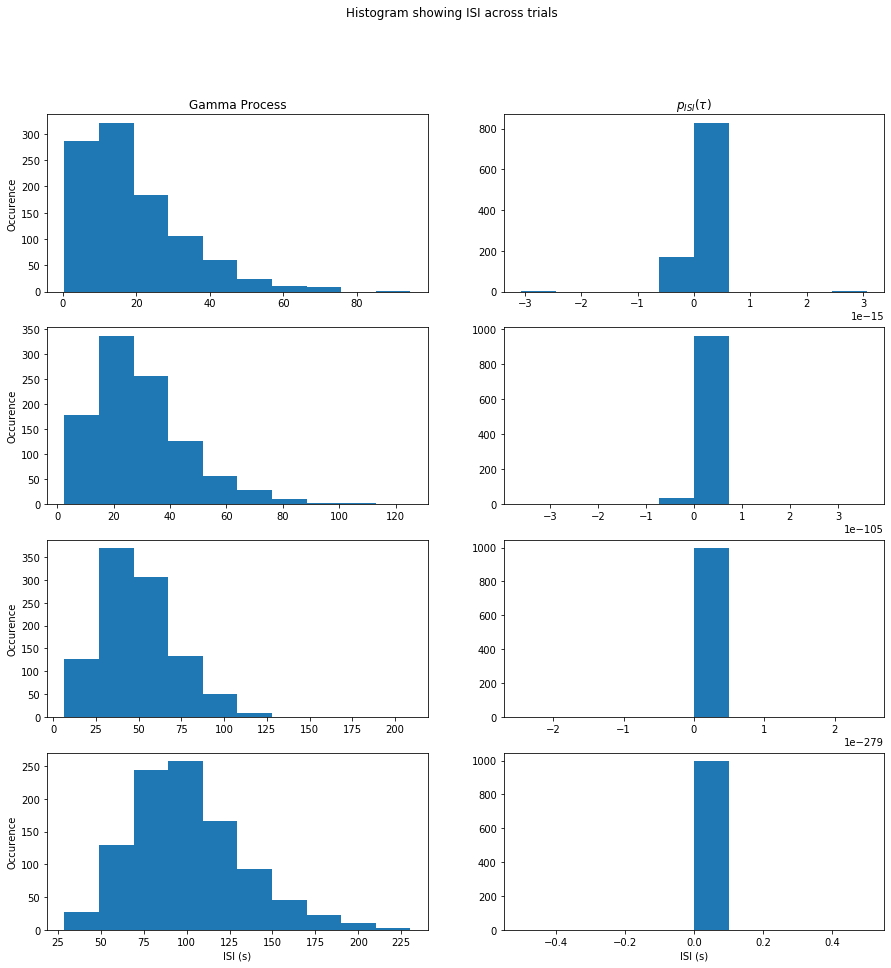

In [53]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

isi_2 = np.diff(gamma_2)
p_2 = p_ISI(isi_2,2)
p_isi_2 = np.diff(p_2)
plt.sca(axes[0,0])
plt.hist(isi_2,10)
plt.sca(axes[0,1])
plt.hist(p_isi_2,10)

isi_3 = np.diff(gamma_3)
p_3 = p_ISI(isi_3,3)
p_isi_3 = np.diff(p_3)
plt.sca(axes[1,0])
plt.hist(isi_3,10)
plt.sca(axes[1,1])
plt.hist(p_isi_3,10)

isi_5 = np.diff(gamma_5)
p_5 = p_ISI(isi_5,5)
p_isi_5 = np.diff(p_5)
plt.sca(axes[2,0])
plt.hist(isi_5,10)
plt.sca(axes[2,1])
plt.hist(p_isi_5,10)

isi_10 = np.diff(gamma_10)
p_10 = p_ISI(isi_10,10)
p_isi_10 = np.diff(p_10)
plt.sca(axes[3,0])
plt.hist(isi_10,10)
plt.sca(axes[3,1])
plt.hist(p_isi_10,10)

plt.suptitle('Histogram showing ISI across trials')
axes[0,0].set_title('Gamma Process')
axes[0,1].set_title('$p_{ISI}(\\tau)$')
axes[3,0].set_xlabel('ISI (s)')
axes[3,1].set_xlabel('ISI (s)')
axes[0,0].set_ylabel('Occurence')
axes[1,0].set_ylabel('Occurence')
axes[2,0].set_ylabel('Occurence')
axes[3,0].set_ylabel('Occurence')
plt.show()

In [55]:
cvs_gamma = []
cvs_theoritical = []
cvs_gamma.append(np.std(isi_2) / np.mean(isi_2))
cvs_gamma.append(np.std(isi_3) / np.mean(isi_3))
cvs_gamma.append(np.std(isi_5) / np.mean(isi_5))
cvs_gamma.append(np.std(isi_10) / np.mean(isi_10))
cvs_theoritical.append(np.std(p_isi_2) / np.mean(p_isi_2))
cvs_theoritical.append(np.std(p_isi_3) / np.mean(p_isi_3))
cvs_theoritical.append(np.std(p_isi_5) / np.mean(p_isi_5))
cvs_theoritical.append(np.std(p_isi_10) / np.mean(p_isi_10))
print(cvs_gamma)
print(cvs_theoritical)

[0.7116705495325343, 0.5725067346808198, 0.439983240531498, 0.3233305481385786]
[6.307304457788553e+52, -9.745959640307233e+158, nan, nan]
